# Лабораторная работа # 1

# 0. Инициализация

In [2]:
from matplotlib import rc
rc('animation', html='jshtml')

import matplotlib as mpl
mpl.rcParams['animation.embed_limit'] = 1000.0 

import numpy as np
from math import sqrt
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter

%matplotlib inline
plt.style.use('fivethirtyeight')

## Градиент

In [3]:
delta = 1e-6
def grad(f, x):
    """
    Функция вычисления градиента в заданной точке с константной точностью

    Аргументы:
    f -- функция
    x -- точка

    Возвращает:
    ans -- градиент функции в точке x
    """

    n = len(x)
    xd = np.copy(x)
    ans = np.zeros(n)

    for i in range(n):
        xd[i] += delta
        ans[i] = np.divide(f(xd) - f(x), delta)
        xd[i] -= delta

    return ans

## Градиентный спуск

In [4]:
def gradient_descent(f, x0, lr_search_func, num_iterations=1000, eps=1e-6, step_size=1):
    """
    Функция вычисления градиентного спуска с заданной функцией поиска коэффициента обучения

    Аргументы:
    f -- функция
    x0 -- начальная точка
    ----------------------------------------------------------------------------
    lr_search_func -- функция поиска оптимального коэффициента обучения (learning rate)
        Аргументы:
        f -- функция
        a -- левая граница интервала
        b -- правая граница интервала
        eps -- точность поиска

        Возвращает:
        x -- точка минимума функции
    ----------------------------------------------------------------------------
    eps -- точность поиска
    num_iterations -- количество итераций
    step_size -- размер шага

    Возвращает:
    points -- массив оптимальных на каждом шаге точек
    """
    def line_search(x, d):
        fd = lambda alpha: f(x - alpha*d)
        alpha = lr_search_func(fd, 0, 1, eps)
        return alpha

    x = np.copy(x0)
    points = np.array([x])
    for i in range(num_iterations):
        grad_x = grad(f, x);
        x = x - grad_x * line_search(x, grad_x) * step_size
        points = np.vstack([points, x])
    return points

## Для отрисовки

In [5]:
def print_f(elev = 30, azim = 60):
  plt.figure(figsize=(10, 10))
  ax = plt.subplot(111, projection='3d')
  ax.view_init(elev=35, azim=45)
  Z = np.vectorize(lambda x, y: f(np.array([x, y])))(X, Y)
  ax.plot_surface(X, Y, Z)
  plt.plot(x0[0], x0[1], f(x0), 'ro', label='Начальная точка')
  ax.view_init(elev=elev, azim=azim)
  plt.legend(loc='upper left')
  plt.show()

In [6]:
def print_lines_grad(list_result, list_label):
  fig = plt.figure(figsize=(10, 10))
  ax = fig.add_subplot(111)

  Z = np.vectorize(lambda x, y: f(np.array([x, y])))(X, Y)

  for i in range(len(list_result)):
    levels=np.unique(np.sort(f(list_result[i].T)))
    ax.contour(X, Y, Z, levels=levels, colors='red', antialiased=True, linewidths=1.0)

  for i in range(len(list_result)):
    x = list_result[i][:, 0]
    y = list_result[i][:, 1]
    ax.plot(x, y, marker='.', markersize=10, markerfacecolor='black', label=list_label[i], linewidth = 2)
    print(f'{list_label[i]:15} ==> {f(list_result[i][-1]):10f} in [{list_result[i][-1][0]:10f}, {list_result[i][-1][1]:10f}]')

  plt.legend(loc='upper left')
  plt.show()

In [7]:
def print_lines_grad_animated(list_result, list_label, interval=100, frames=-1):
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(111)
    Z = np.vectorize(lambda x, y: f(np.array([x, y])))(X, Y)
    def frame(w):
        ax.clear()

        for i in range(len(list_result)):
          levels=np.unique(np.sort(f(list_result[i][:frames].T)))
          ax.contour(X, Y, Z, levels, colors='red', antialiased=True, linewidths=1.0)

        for i in range(len(list_result)):
          x = list_result[i][:w, 0]
          y = list_result[i][:w, 1]
          ax.plot(x, y, marker='.', markersize=10, markerfacecolor='black', label=list_label[i], linewidth = 2)

        ax.legend(loc='upper left')

        return ax

    plt.close()
    if frames == -1 or frames > len(list_result[0]):
      frames = len(list_result[0])

    return FuncAnimation(fig, frame, interval=interval, frames=frames, blit=False, repeat=True)

In [8]:
def print_full_grad(list_result, list_label, elev = 30, azim = 80):
  fig = plt.figure(figsize=(10, 10))
  ax = fig.add_subplot(projection='3d')
  Z = np.vectorize(lambda x, y: f(np.array([x, y])))(X, Y)

  for i in range(len(list_result)):
    x = list_result[i][:, 0]
    y = list_result[i][:, 1]
    z = np.vectorize(lambda x, y: f(np.array([x, y])))(x, y)
    ax.plot(x, y, marker='.', markersize=10, markerfacecolor='black', zs=z, label=list_label[i], linewidth = 2)
    print(f'{list_label[i]:15} ==> {f(list_result[i][-1]):10f} in [{list_result[i][-1][0]:10f}, {list_result[i][-1][1]:10f}]')
    
  ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
  ax.view_init(elev=elev, azim=azim)
  ax.legend(loc='upper left')
  plt.show()

In [9]:
def print_full_grad_animated(list_result, list_label, interval=100, frames=-1, elev = 30, azim = 80):
    fig = plt.figure(figsize=(7, 7))
    ax = plt.axes(projection='3d')
    Z = np.vectorize(lambda x, y: f(np.array([x, y])))(X, Y)

    def frame(w):
        ax.clear()
        for i in range(len(list_result)):
            x = list_result[i][:w+1, 0]
            y = list_result[i][:w+1, 1]
            z = np.vectorize(lambda x, y: f(np.array([x, y])))(x, y)
            ax.plot(x, y, marker='.', markersize=10, markerfacecolor='black', zs=z, label=list_label[i], linewidth = 2, markevery=(w,w+1))

        ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
        ax.view_init(elev=elev, azim=azim)
        ax.legend(loc='upper left')

        return ax

    plt.close()
    if frames == -1 or frames > len(list_result[0]):
      frames = len(list_result[0])

    return FuncAnimation(fig, frame, interval=interval, frames=frames, blit=False, repeat=True)

## Для вывода

In [10]:
def print_result(result):
  print(len(result))
  for i in range(0, len(result)):
    print(i, result[i])

# 1. Реализуйте градиентный спуск с постоянным шагом (learning rate).

In [11]:
def gradient_descent_constant(f, x0, lr=0.01, num_iterations=1000):
    """
    Градиентный спуск с постоянным шагом.

    Аргументы:
    f -- функция
    x0 -- начальная точка
    lr -- постоянный коэффициент обучения (learning rate)
    num_iterations -- количество итераций

    Возвращает:
    gradient_descent(...)
    """
    def const_lr(f, a, b, eps=1e-6):
        return lr
    
    return gradient_descent(f, x0, const_lr, num_iterations)

# 2. Реализуйте метод одномерного поиска (метод дихотомии, метод Фибоначчи, метод золотого сечения) и градиентный спуск на его основе.

## (a) Метод дихотомии

In [12]:
def dichotomy_search(f, a, b, eps=1e-6):
    """
    Метод дихотомии для поиска минимума функции f на интервале [a,b] с точностью eps

    Аргументы:
    f -- функция
    a -- начальная точка интервала
    b -- конечная точка интервала
    eps -- точность поиска

    Возвращает:
    x -- точка минимума функции
    """
    while b - a > eps:
        c = (a + b) / 2
        if f(c - eps) < f(c + eps):
            b = c
        else:
            a = c
    return (a + b) / 2

def gradient_descent_dichotomy(f, x0, num_iterations=1000, eps=1e-6, step_size=0.01):
    """
    Градиентный спуск на основе метода дихотомии

    Аргументы:
    f -- функция
    x0 -- начальная точка
    num_iterations -- количество итераций
    eps -- точность поиска
    step_size -- размер шага
    
    Возвращает:
    gradient_descent(...)
    """

    return gradient_descent(f, x0, dichotomy_search, num_iterations, eps, step_size)

## (b) Метод Фибоначчи

In [13]:
def fibonacci_search(f, a, b, n):
    """
    Метод Фибоначчи для одномерного поиска.

    Аргументы:
    f -- функция
    a -- левая граница интервала
    b -- правая граница интервала
    n -- "точность" поиска функции

    Возвращает:
    x -- точка минимума
    """

    fib = [1, 1]
    while fib[-1] < n:
        fib.append(fib[-1] + fib[-2])

    k = len(fib) - 1
    x1 = a + (fib[k - 2] / fib[k]) * (b - a)
    x2 = a + (fib[k - 1] / fib[k]) * (b - a)
    f1 = f(x1)
    f2 = f(x2)

    for i in range(k - 2):
        if f1 < f2:
            b = x2
            x2 = x1
            f2 = f1
            x1 = a + (fib[k - i - 3] / fib[k - i - 1]) * (b - a)
            f1 = f(x1)
        else:
            a = x1
            x1 = x2
            f1 = f2
            x2 = a + (fib[k - i - 2] / fib[k - i - 1]) * (b - a)
            f2 = f(x2)

    return (a + b) / 2

def gradient_descent_fibonacci(f, x0, num_iterations=1000, n=6900, step_size=0.01):
    """
    Градиентный спуск на основе метода Фибоначчи

    Аргументы:
    f -- функция
    x0 -- начальная точка
    num_iterations -- количество итераций
    n -- "точность" поиска
    step_size -- размер шага
    
    Возвращает:
    gradient_descent(...)
    """

    return gradient_descent(f, x0, fibonacci_search, num_iterations, n, step_size)

## (c) Метод золотого сечения

In [14]:
def golden_section_search(f, a, b, eps=1e-6):
    """
    Метод золотого сечения для одномерного поиска.

    Аргументы:
    f -- функция
    a -- левая граница интервала
    b -- правая граница интервала
    eps -- точность поиска функции

    Возвращает:
    x -- точка минимума
    """
    phi = (1 + np.sqrt(5)) / 2
    x1 = b - (b - a) / phi
    x2 = a + (b - a) / phi
    while abs(b - a) > eps:
        if f(x1) < f(x2):
            b = x2
        else:
            a = x1
        x1 = b - (b - a) / phi
        x2 = a + (b - a) / phi
    return (a + b) / 2

def gradient_descent_golden_section(f, x0, num_iterations=1000, eps=1e-6, step_size=0.01):
    """
    Градиентный спуск на основе метода золотого сечения.

    Аргументы:
    f -- функция
    x0 -- начальная точка
    num_iterations -- количество итераций
    eps -- точность поиска

    Возвращает:
    gradient_descent(...)
    """
    return gradient_descent(f, x0, golden_section_search, num_iterations, eps, step_size)

# 5. Реализуйте генератор случайных квадратичных функций $n$ переменных с числом обусловленности $k$.

# Test

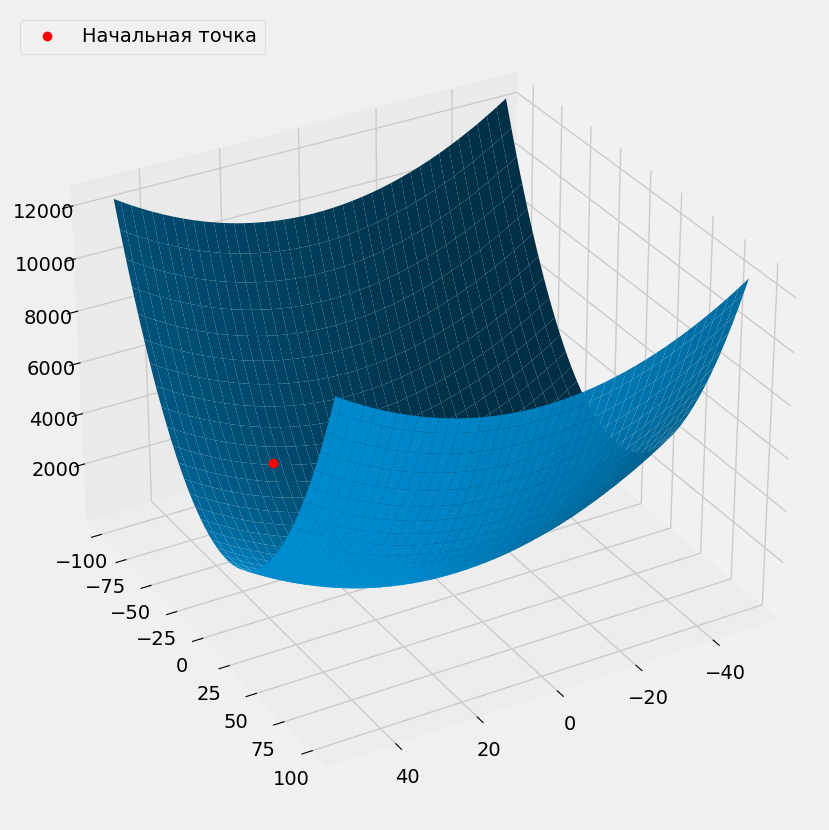

In [15]:
def f(x):
    return x[0] ** 2 + x[1] ** 2

x = np.linspace(-50, 50, 120)
y = np.linspace(-100, 100, 120)
X, Y = np.meshgrid(x, y)

x0 = np.array([25, -50], dtype=float)

print_f()

In [16]:
num_iter = 100;

result = [gradient_descent_constant(f, x0, lr=0.1, num_iterations=num_iter),
          gradient_descent_dichotomy(f, x0, step_size=1, num_iterations=num_iter),
          gradient_descent_golden_section(f, x0, step_size=1, num_iterations=num_iter),
          gradient_descent_fibonacci(f, x0, step_size=1, num_iterations=num_iter)]
result_label = ['constant', 'dichotomy', 'golden_section', 'fibonacci']

constant        ==>   0.000000 in [ -0.000000,  -0.000001]
dichotomy       ==>   0.000000 in [ -0.000001,  -0.000000]
golden_section  ==>   0.000000 in [ -0.000001,  -0.000000]
fibonacci       ==>   0.000000 in [ -0.000000,  -0.000000]


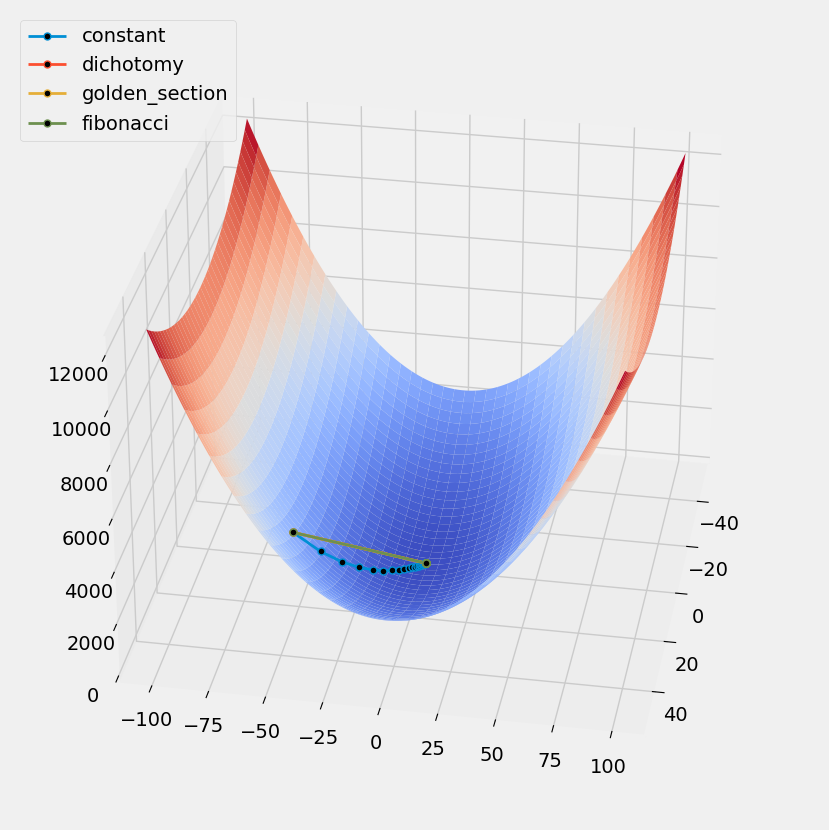

In [17]:
print_full_grad(result, result_label, azim=10)
# print_full_grad_animated(result, result_label, interval=100, frames=100, azim=200)

constant        ==>   0.000000 in [ -0.000000,  -0.000001]
dichotomy       ==>   0.000000 in [ -0.000001,  -0.000000]
golden_section  ==>   0.000000 in [ -0.000001,  -0.000000]
fibonacci       ==>   0.000000 in [ -0.000000,  -0.000000]


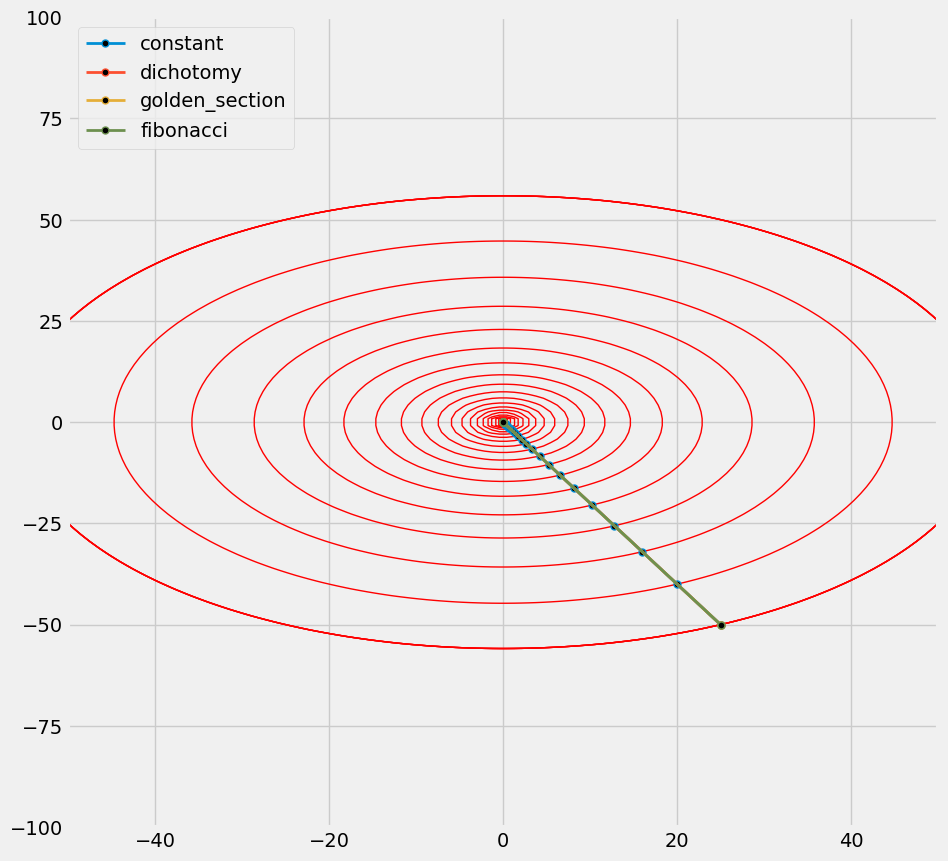

In [18]:
print_lines_grad(result, result_label)
# print_lines_grad_animated(result, result_label, interval=100, frames=100)